In [38]:
import pandas as pd
import numpy as np
import pprint

data = pd.read_csv('games_of_all_time.csv')
model_data = data[['meta_score','platform', 'developer']]
model_data = model_data.dropna()

model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8821 entries, 0 to 8830
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   meta_score  8821 non-null   float64
 1   platform    8821 non-null   object 
 2   developer   8821 non-null   object 
dtypes: float64(1), object(2)
memory usage: 275.7+ KB


/Users/sahibbhatia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

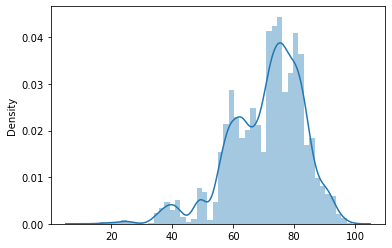

In [39]:
import seaborn as sns

sns.distplot(model_data[['meta_score']])


In [40]:
def make_platform_arr(index):
    g_arr = model_data[['platform']].iloc[index][0][1:len(model_data[['platform']].iloc[index][0])-1].split(',')
    for i in range(len(g_arr)):
        g_arr[i] = g_arr[i].strip()
        g_arr[i] = g_arr[i][1:len(g_arr[i])-1]
    return g_arr

In [43]:
var_dict = {}
pp = pprint.PrettyPrinter(indent=4)

for i in range(model_data.shape[0]):
    gs = make_platform_arr(i)
    for genre in gs:
        if genre in var_dict:
            var_dict[genre] += 1
        else:
            var_dict[genre] = 1
            
delete = []

for platform in var_dict:
    if var_dict[platform] <= 10:
        delete.append(platform)

for platform in delete:
    del var_dict[platform]
    
platforms = var_dict.keys()

platform_dict = {}

for platform in platforms:
    platform_dict[platform] = [0]*model_data.shape[0]
    

for i in range(model_data.shape[0]):
    gs = make_platform_arr(i)
    for platform in gs:
        if platform in platform_dict:
            platform_dict[platform][i] = 1

print(len(var_dict.keys()))
pp.pprint(var_dict)
print(platforms)
print('Success!')

21
{   '3ds': 246,
    'dreamcast': 80,
    'ds': 453,
    'game-boy-advance': 295,
    'gamecube': 300,
    'nintendo-64': 48,
    'pc': 3104,
    'playstation': 127,
    'playstation-2': 880,
    'playstation-3': 820,
    'playstation-4': 1343,
    'playstation-5': 90,
    'playstation-vita': 170,
    'psp': 325,
    'switch': 929,
    'wii': 398,
    'wii-u': 123,
    'xbox': 483,
    'xbox-360': 1015,
    'xbox-one': 746,
    'xbox-series-x': 49}
dict_keys(['nintendo-64', 'wii', 'gamecube', 'switch', 'xbox', 'dreamcast', 'playstation-3', 'playstation', 'playstation-2', 'pc', 'game-boy-advance', 'playstation-4', '3ds', 'xbox-360', 'wii-u', 'playstation-vita', 'ds', 'xbox-one', 'psp', 'playstation-5', 'xbox-series-x'])
Success!


In [44]:
model_data[['developer']]

,developer
0,Nintendo
1,Nintendo
2,Nintendo EAD Tokyo
3,Retro Studios
4,Nintendo
...,...
8826,Namco
8827,Techland
8828,Kenny Creanor
8829,THQ


In [46]:
model_data['developer'] = model_data['developer'].apply(lambda x : str(x).lower())
var_dict2 = {}
for developer in model_data[['developer']].iloc:
    if developer[0] in var_dict2:
        var_dict2[developer[0]] +=1
    else:
        var_dict2[developer[0]] =1
developers = var_dict2.keys()

developer_dict = {}
for developer in developers:
    developer_dict[developer] = [0]*model_data.shape[0]
for i in range(model_data.shape[0]):
    r = model_data[['developer']].iloc[i][0]
    developer_dict[r] = 1

print(len(var_dict2.keys()))
pp.pprint(var_dict2)
print(developers)
print('Success!')

2927
{   '101%': 1,
    '10tacle studios': 1,
    '10tons': 2,
    '10tons entertainment': 3,
    '10tons ltd': 3,
    '11 bit studios': 7,
    '13am games': 2,
    '14 degrees east': 2,
    '17 bit': 1,
    '17-bit': 1,
    '1c': 7,
    '1c entertainment': 2,
    '1c game studios': 1,
    '1c-softclub': 2,
    '1c: maddox games': 2,
    '1c:ino-co': 1,
    '2 dawn games': 1,
    '2 ton studios': 1,
    '2015': 2,
    '24 entertainment': 1,
    '258 productions ab': 1,
    '2awesome studio': 1,
    '2by3 games': 1,
    '2d boy': 1,
    '2k australia': 1,
    '2k czech': 3,
    '2k games': 2,
    '2k marin': 3,
    '2k sports': 4,
    '2x2 games': 2,
    '2xl games': 1,
    '3 sprockets': 1,
    '3000ad, inc.': 2,
    '343 industries': 6,
    '34bigthings': 1,
    '369 interactive': 2,
    '3d people': 2,
    '3d realms': 2,
    '3d6 games': 1,
    '3dclouds': 1,
    '3dclouds.it': 2,
    '3do': 16,
    '3g studios': 1,
    '3rd eye studios oy ltd': 1,
    '49games': 4,
    '4a games': 

    'frame interactive': 1,
    'freakzone': 2,
    'frecle aps': 1,
    'free lives': 1,
    'free radical design': 4,
    'free reign entertainment': 1,
    'freebird games': 1,
    'freedom llc': 3,
    'freejam': 1,
    'freestylegames': 5,
    'french-bread': 1,
    'frictional games': 5,
    'frima studio': 6,
    'frogmind': 1,
    'frogwares': 9,
    'from software': 31,
    'frontier developments': 15,
    'frontline studios': 1,
    'frost monkey games': 1,
    'frostwood interactive': 2,
    'frozen codebase': 2,
    'frozen district': 1,
    'frozenbyte, inc.': 8,
    'fugitive games': 1,
    'full control aps': 2,
    'full fat': 2,
    'full-fat': 3,
    'fun bits': 1,
    'fun labs': 2,
    'funcom': 11,
    'funnel entertainment': 1,
    'funomena': 1,
    'funselektor labs inc.': 2,
    'fury software': 1,
    'furyu': 1,
    'fuse games limited': 2,
    'fusionsphere systems': 2,
    'future games': 3,
    'futurlab': 4,
    'fuzzy wuzzy games': 1,
    'fuzzyeyes stud

    'runic games': 3,
    'runner duck': 2,
    'running dog': 1,
    'running with scissors': 4,
    'runtime': 1,
    'rutubo games': 1,
    'ruud koorevaar': 1,
    'ryu ga gotoku studios': 6,
    's&g software': 1,
    's2 games': 2,
    'sabarasa entertainment': 1,
    'saber interactive': 12,
    'sabertooth games': 1,
    'sabotage studio': 1,
    'sadsquare studio': 1,
    'saffire': 5,
    'saibot studios': 1,
    'sam barlow': 1,
    'samurai punk': 1,
    'sand grain studios': 1,
    'sand sailor studio': 1,
    'sandblast': 1,
    'sandbox interactive': 1,
    'sandlot': 5,
    'santa entertainment': 1,
    'santa ragione': 2,
    'sanzaru games': 6,
    'sarbakan inc.': 1,
    'sarepta studio': 1,
    'sassybot': 1,
    'saturn+': 1,
    'saturnine games': 2,
    'saurus': 1,
    'savage entertainment': 1,
    'sawfly studios': 1,
    'scavengers studio': 1,
    'sce japan studio': 19,
    'sce santa monica': 7,
    'sce studio cambridge': 1,
    'sce/wws': 2,
    'scea': 

In [48]:
from sklearn.model_selection import train_test_split

for platform in platform_dict:
    model_data[platform] = platform_dict[platform]

for developer in developer_dict:
    model_data[developer] = developer_dict[developer]

y = model_data[['meta_score']]
x = model_data.drop(columns = ['developer', 'meta_score', 'platform'])

print(x.info())

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8821 entries, 0 to 8830
Columns: 2948 entries, nintendo-64 to kenny creanor
dtypes: int64(2948)
memory usage: 198.5 MB
None


In [52]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=1000, random_state=0)

regr.fit(x_train, np.ravel(y_train))

regr.score(x_test, np.ravel(y_test))


0.0193451884210597

[72.51243519 68.52954495 66.47806433 ... 66.47806433 75.80259928
 66.47806433]


/Users/sahibbhatia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

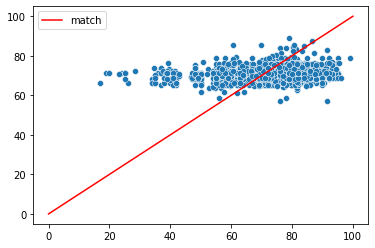

In [53]:
import seaborn as sns
pred = regr.predict(x_test)
print(pred)
sns.scatterplot(x=np.ravel(y_test), y=pred)
sns.lineplot([0,100], [0,100], hue=['match','match'], palette=['r'])